# Importando las librerías para el análisis exploratorio de datos (EDA)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import spearmanr



## Lectura del archivo de salarios y creación del DataFrame





In [4]:
df = pd.read_csv("ds_salaries.csv")
df = pd.DataFrame(df)


In [5]:
# Se crea una copia
df1 = df.copy()


## Se visualiza y analiza la información de cada columna. Primero, se realiza un .info() y después se examinan los valores.


In [6]:
# Información de cada columna.
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [7]:
# Se crea una función que permite conocer las categorías y los valores de cada columna.
def info_columna(df):
    """
    Esta función genera un resumen de cada columna en el DataFrame df,
    mostrando los diferentes valores y su frecuencia.

    Parámetros: df
    """
    for columna in df.columns:
        print(f"Resumen de la columna '{columna}':")
        print(df[columna].value_counts())
        print("============================================")

# Aplicación de la función recién creada.
info_columna(df)


Resumen de la columna 'work_year':
work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64
Resumen de la columna 'experience_level':
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
Resumen de la columna 'employment_type':
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64
Resumen de la columna 'job_title':
job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Principal Data Architect        1
Head of Machine Learning        1
Cloud Data Architect            1
Staff Data Scientist            1
Finance Data Analyst            1
Name: count, Length: 93, dtype: int64
Resumen de la columna 'salary':
salary
100000     112
150000     100
120000      99
160000      85
130000      85
          ... 
188000       1
2100000      1
51400

## Limpieza DF

In [8]:
# Se eliminan las columnas 'salary' y 'salary_currency'
df.drop(["salary", "salary_currency"], axis=1, inplace=True)

# Se leen los nombres de los países desde el archivo "countries.csv" para renombrar las abreviaturas.
df_nombres_paises = pd.read_csv("countries.csv")
dic_nombres_paises = dict(zip(df_nombres_paises[' iso2'], df_nombres_paises[' name']))

# Se reemplazan las abreviaturas por nombres completos
df["employee_residence"].replace(dic_nombres_paises, inplace=True)
df["company_location"].replace(dic_nombres_paises, inplace=True)

# Función lambda para comprobar si el empleado reside en el mismo país donde trabaja
df["mismo_pais"] = df.apply(lambda row: row["employee_residence"] == row["company_location"], axis=1)

df_final = df.copy()

/tmp/ipython-input-8-2911559284.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["employee_residence"].replace(dic_nombres_paises, inplace=True)
/tmp/ipython-input-8-2911559284.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [9]:
# Chequeo de valores nulos.
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0
company_size,0
mismo_pais,0


Se ha realizado una limpieza y procesamiento preliminar del DataFrame. En este proceso, se eliminaron las columnas innecesarias, se transformaron y reemplazaron valores, se renombraron los países con sus nombres completos y se generaron variables de interés, como la que indica si el empleado reside en el mismo país donde trabaja. Adicionalmente, se revisó la información general del DataFrame, su estructura y algunos registros de muestra.


## Outliers análisis

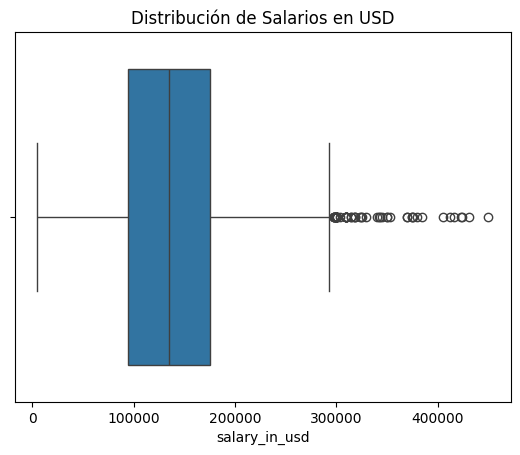

In [10]:
# Creación de un boxplot para visualizar los outliers en las variables principales.
sns.boxplot(df, x="salary_in_usd")
plt.title('Distribución de Salarios en USD')
plt.show()

In [11]:
# Cálculo de outliers y su representación
limite_inferior = df['salary_in_usd'].quantile(0.25) - 1.5 * (df['salary_in_usd'].quantile(0.75) - df['salary_in_usd'].quantile(0.25))
limite_superior = df['salary_in_usd'].quantile(0.75) + 1.5 * (df['salary_in_usd'].quantile(0.75) - df['salary_in_usd'].quantile(0.25))

print(f"El límite inferior para los outliers es: {limite_inferior}")
print(f"El límite superior para los outliers es: {limite_superior}")

outliers = df[(df['salary_in_usd'] < limite_inferior) | (df['salary_in_usd'] > limite_superior)]
print(f"La cantidad de outliers en el DataFrame es: {len(outliers)}")
print(f"Los outliers representan el {len(outliers) / len(df) * 100:.2f}% del total de los datos")

# Se muestran las filas del DataFrame original que son outliers
df_outliers = df[(df["salary_in_usd"] < limite_inferior) | (df["salary_in_usd"] > limite_superior)]
df_outliers_ordenado = df_outliers.sort_values(by='salary_in_usd', ascending=False)
df_outliers_ordenado.head()

El límite inferior para los outliers es: -25000.0
El límite superior para los outliers es: 295000.0
La cantidad de outliers en el DataFrame es: 63
Los outliers representan el 1.68% del total de los datos


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,mismo_pais
3522,2020,MI,FT,Research Scientist,450000,United States of America,0,United States of America,M,True
2011,2022,MI,FT,Data Analyst,430967,United Kingdom,0,United Kingdom,M,True
528,2023,SE,FT,AI Scientist,423834,Israel,0,Israel,L,True
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,United States of America,50,United States of America,L,True
3675,2021,EX,CT,Principal Data Scientist,416000,United States of America,100,United States of America,S,True


En el conjunto de datos, se encontró que el 1.68% de los salarios se clasifican como valores atípicos (outliers). Estos corresponden principalmente a cargos directivos y ejecutivos en empresas medianas y grandes con sede en Estados Unidos

## Análisis de variables

# 1. Salary

In [12]:
# Análisis de asimetría y curtosis
moda_salario = df['salary_in_usd'].mode()[0]
asimetria = skew(df['salary_in_usd'])
curtosis_valor = kurtosis(df['salary_in_usd'])

print(f"La moda del salario es: {moda_salario}")
print(f"El coeficiente de asimetría es: {asimetria}")
print(f"La curtosis es: {curtosis_valor}")

# Test de normalidad
_, valor_p = shapiro(df["salary_in_usd"])

print("\nResultado del test de normalidad:")
if valor_p > 0.05:
    print("La distribución sigue una distribución normal")
else:
    print("La distribución no sigue una distribución normal")

La moda del salario es: 100000
El coeficiente de asimetría es: 0.5361868674235593
La curtosis es: 0.8312989014514311

Resultado del test de normalidad:
La distribución no sigue una distribución normal


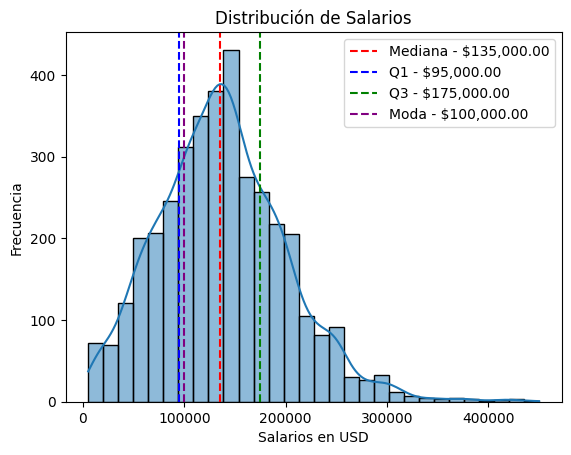

In [13]:
# Gráfico de distribución del salario con visualización de Q1, Q3, mediana y moda.
sns.histplot(df["salary_in_usd"], bins=30, kde=True)
plt.title("Distribución de salarios")
plt.xlabel("Salarios en USD")
plt.ylabel("Frecuencia")

mediana_salario = df["salary_in_usd"].median()
q1_salario = np.percentile(df["salary_in_usd"], 25)
q3_salario = np.percentile(df["salary_in_usd"], 75)
moda_salario = df["salary_in_usd"].mode()[0]

plt.axvline(mediana_salario, color='red', linestyle='--', label=f'Mediana - ${mediana_salario:,.2f}')
plt.axvline(q1_salario, color='blue', linestyle='--', label=f'Q1 - ${q1_salario:,.2f}')
plt.axvline(q3_salario, color='green', linestyle='--', label=f'Q3 - ${q3_salario:,.2f}')
plt.axvline(moda_salario, color='purple', linestyle='--', label=f'Moda - ${moda_salario:,.2f}')
plt.legend()

plt.show()


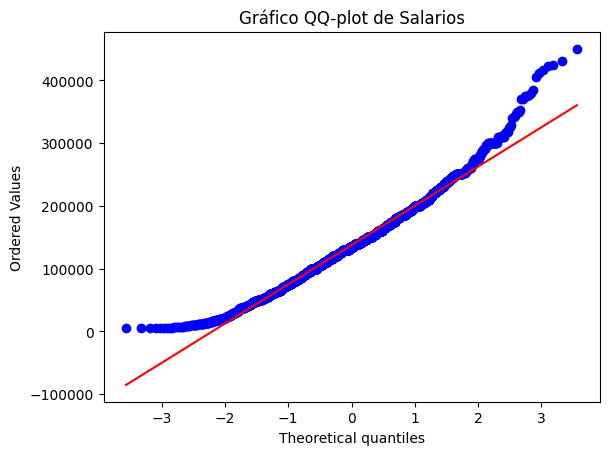

In [14]:
# Gráfico QQ-plot para comprobar que la variable de salario no sigue una distribución normal.
probplot(df["salary_in_usd"], plot=plt)
plt.title("Gráfico QQ-plot de salarios")
plt.show()

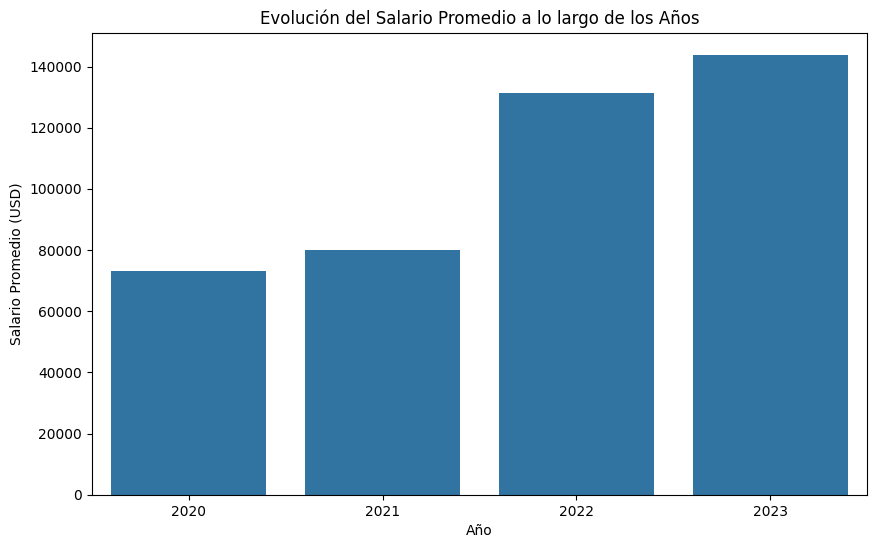

   work_year  salary_in_usd  diferencia  cambio_%
0       2020        73065.0         0.0         0
1       2021        80000.0      6935.0         9
2       2022       131300.0     51300.0        64
3       2023       143860.0     12560.0         9


In [15]:
# Se calcula el salario promedio (mediana) por año
salario_promedio_por_ano = df.groupby("work_year")["salary_in_usd"].median().reset_index()
salario_promedio_por_ano = salario_promedio_por_ano.sort_values("work_year")

# Se calcula el incremento del salario promedio año a año
salario_promedio_por_ano['diferencia'] = salario_promedio_por_ano['salary_in_usd'].diff().fillna(0)
salario_promedio_por_ano['cambio_%'] = (salario_promedio_por_ano['salary_in_usd'].pct_change() * 100).fillna(0).astype(int)

# Gráfico de barras del salario promedio por año
plt.figure(figsize=(10, 6))
sns.barplot(x="work_year", y="salary_in_usd", data=salario_promedio_por_ano)
plt.xlabel("Año")
plt.ylabel("Salario promedio (USD)")
plt.title("Evolución del salario promedio a lo largo de los años")
plt.show()

print(salario_promedio_por_ano)

La variable de salario presenta una distribución con asimetría positiva y una curtosis inferior a la de una distribución normal. Los salarios oscilan entre 5,132 y 450,000 USD, con una media de 137,570 USD. El salario más frecuente es de 100,000 USD, observado principalmente en roles de nivel medio y senior en empresas medianas de América, especialmente en Estados Unidos.

En cuanto a la evolución anual, se observa un incremento significativo del 64% en el salario promedio de 2021 a 2022, y un aumento del 9% de 2022 a 2023.


# 2. experience_lavel

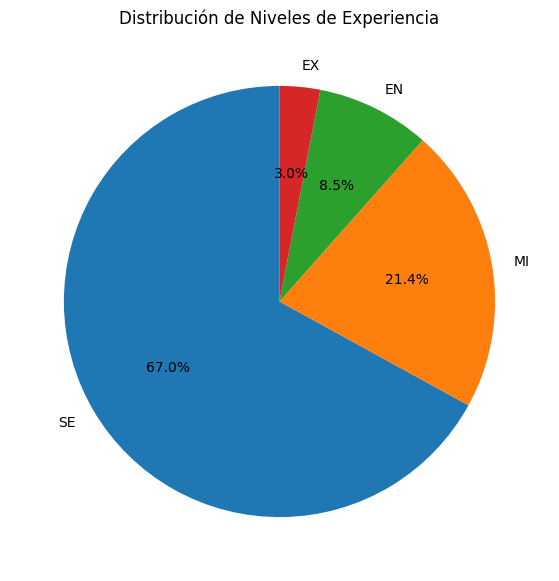

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64


In [16]:
# Conteo de puestos por nivel de experiencia
conteo_experiencia = df['experience_level'].value_counts()

# Gráfico circular
plt.figure(figsize=(10, 7))
plt.pie(conteo_experiencia, labels=conteo_experiencia.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de niveles de experiencia')
plt.show()

print(conteo_experiencia)

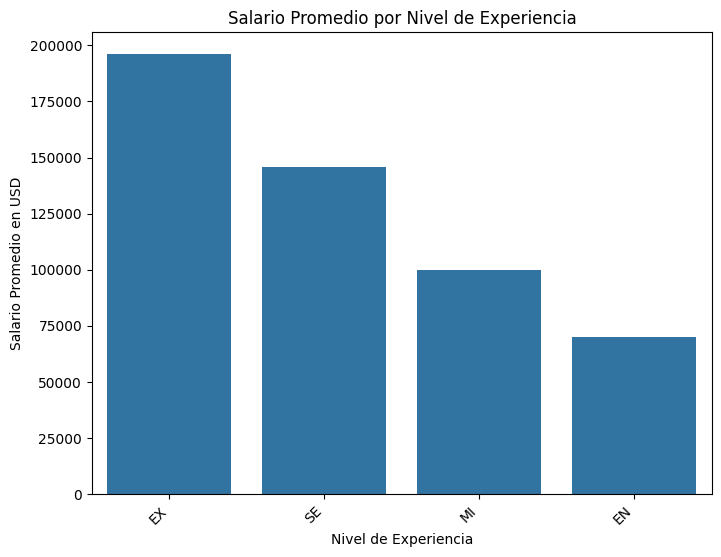

experience_level
EX    196000.0
SE    146000.0
MI    100000.0
EN     70000.0
Name: salary_in_usd, dtype: float64


In [17]:
# Se calcula la mediana salarial por nivel de experiencia
mediana_salario_experiencia = df.groupby('experience_level')['salary_in_usd'].median().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mediana_salario_experiencia.index, y=mediana_salario_experiencia.values)
plt.title('Salario promedio por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario promedio en USD')
plt.xticks(rotation=45, ha='right')
plt.show()

print(mediana_salario_experiencia)

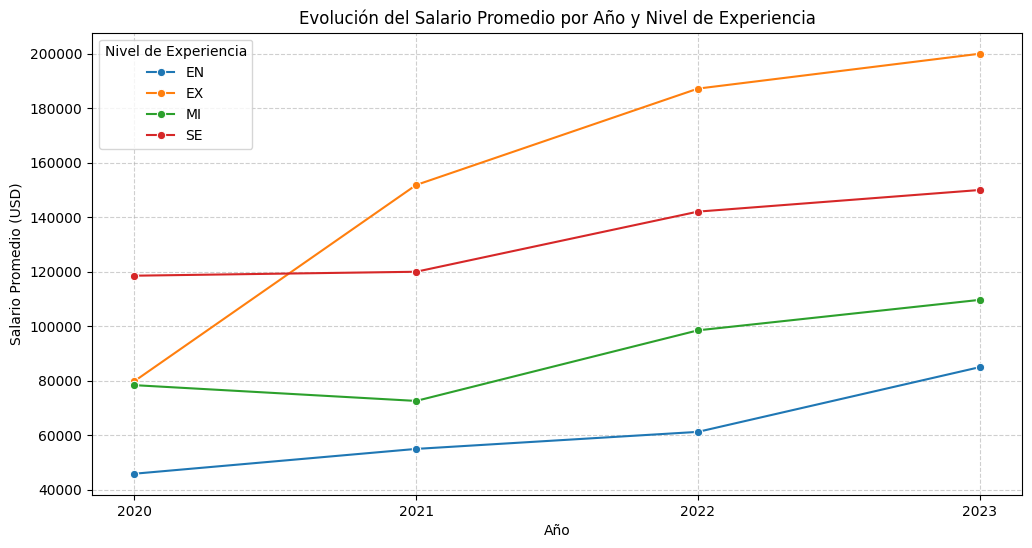

In [18]:
# Se calcula el salario promedio por año y nivel de experiencia
salario_promedio_por_ano_y_experiencia = df.groupby(["work_year", "experience_level"])["salary_in_usd"].median().reset_index()

# Gráfico de líneas que muestra la evolución del salario promedio
plt.figure(figsize=(12, 6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="experience_level", data=salario_promedio_por_ano_y_experiencia, marker='o')
plt.xlabel("Año")
plt.ylabel("Salario promedio (USD)")
plt.title("Evolución del salario promedio por año y nivel de experiencia")
plt.xticks(df['work_year'].unique())
plt.legend(title='Nivel de experiencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

La variable "experience_level" indica el nivel de experiencia de los trabajadores en sus roles actuales. La distribución de esta variable es la siguiente:

Senior: 2516

Mid-level (Intermedio): 805

Entry-level (Inicial): 320

Executive (Ejecutivo): 114

Esta distribución muestra que la mayoría de los trabajadores se encuentran en el nivel Senior, seguidos por los de nivel intermedio, inicial y, finalmente, ejecutivo.

Adicionalmente, se encontró una relación directa entre el nivel de experiencia y el salario promedio. Los empleados de nivel Ejecutivo reciben el salario promedio más alto, seguidos por los de nivel Senior, intermedio y, por último, los de nivel inicial.


# 3. employment_type

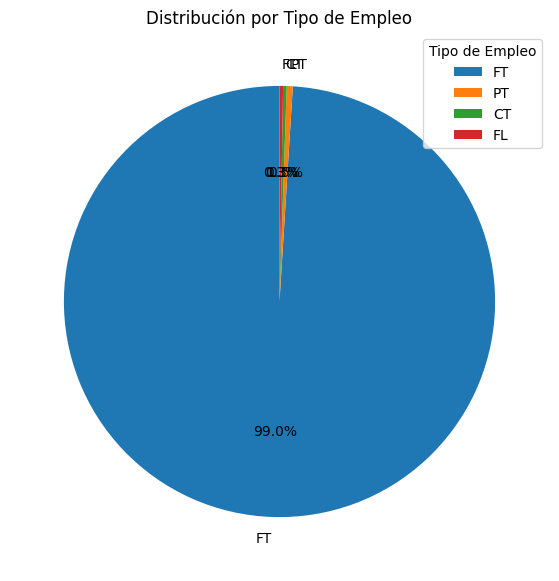

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64


In [19]:
# Conteo del número de puestos por tipo de empleo
conteo_tipo_empleo = df['employment_type'].value_counts()

# Creación de un gráfico circular
plt.figure(figsize=(10, 7))
plt.pie(conteo_tipo_empleo, labels=conteo_tipo_empleo.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por tipo de empleo')
plt.legend(title='Tipo de empleo')
plt.show()

print(conteo_tipo_empleo)

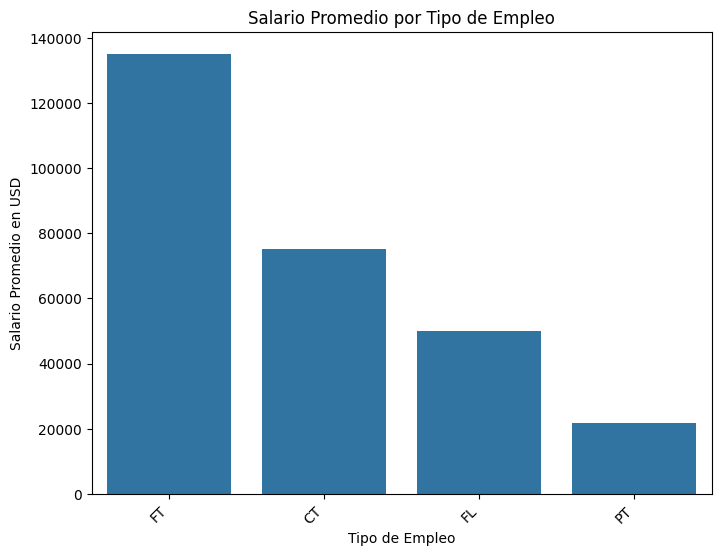

employment_type
FT    135000.0
CT     75000.0
FL     50000.0
PT     21669.0
Name: salary_in_usd, dtype: float64


In [20]:
# Se calcula la mediana salarial por tipo de empleo
mediana_salario_por_tipo_empleo = df.groupby('employment_type')['salary_in_usd'].median().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mediana_salario_por_tipo_empleo.index, y=mediana_salario_por_tipo_empleo.values)
plt.title('Salario promedio por tipo de empleo')
plt.xlabel('Tipo de empleo')
plt.ylabel('Salario promedio en USD')
plt.xticks(rotation=45, ha='right')
plt.show()

print(mediana_salario_por_tipo_empleo)

La variable "employment_type" indica el tipo de contrato del empleado. La distribución es la siguiente:

- **Full-time (FT):** 3718
- **Part-time (PT):** 17
- **Contract (CT):** 10
- **Freelance (FL):** 10

La gran mayoría de los profesionales (99%) trabaja a tiempo completo (Full-time). En cuanto a los salarios, los contratos a tiempo completo y por contrato (Contract) tienen la mediana salarial más alta, mientras que los Freelance tienen la más baja.

# 4. Company_size

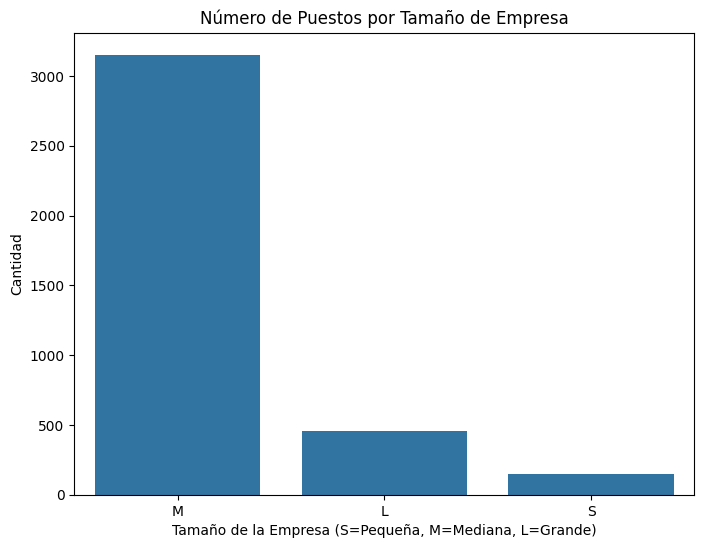

company_size
M    3153
L     454
S     148
Name: count, dtype: int64


In [22]:
# Conteo de puestos por tamaño de empresa
conteo_tamano_empresa = df['company_size'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_tamano_empresa.index, y=conteo_tamano_empresa.values)
plt.title('Número de puestos por tamaño de empresa')
plt.xlabel('Tamaño de la empresa (S=Pequeña, M=Mediana, L=Grande)')
plt.ylabel('Cantidad')
plt.show()

print(conteo_tamano_empresa)

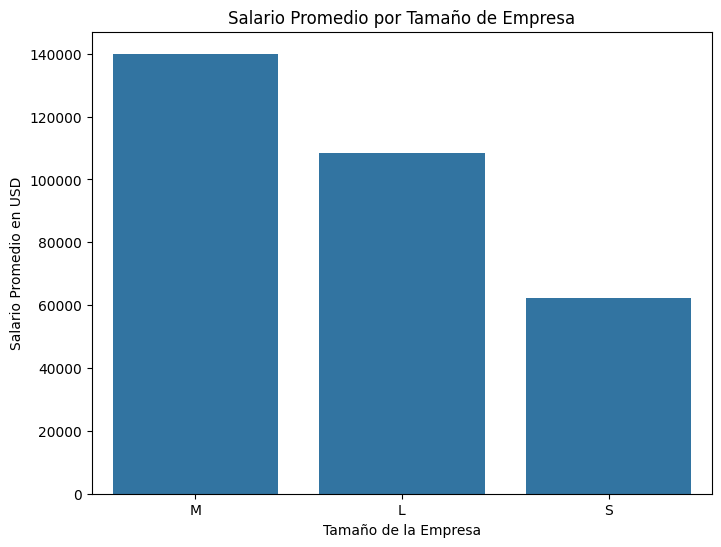

employment_type
FT    135000.0
CT     75000.0
FL     50000.0
PT     21669.0
Name: salary_in_usd, dtype: float64


In [23]:
# Se calcula la mediana salarial por tamaño de empresa
mediana_salario_tamano_empresa = df.groupby('company_size')['salary_in_usd'].median().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mediana_salario_tamano_empresa.index, y=mediana_salario_tamano_empresa.values)
plt.title('Salario promedio por tamaño de empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Salario promedio en USD')
plt.show()

print(mediana_salario_por_tipo_empleo)

La mayoría de los profesionales de datos (84%) trabaja en empresas de tamaño mediano (M). Se observa una relación directa entre el tamaño de la empresa y el salario: las empresas grandes (L) ofrecen salarios promedio más altos que las medianas (M), y estas a su vez, salarios más altos que las pequeñas (S).

# 5. Company_location

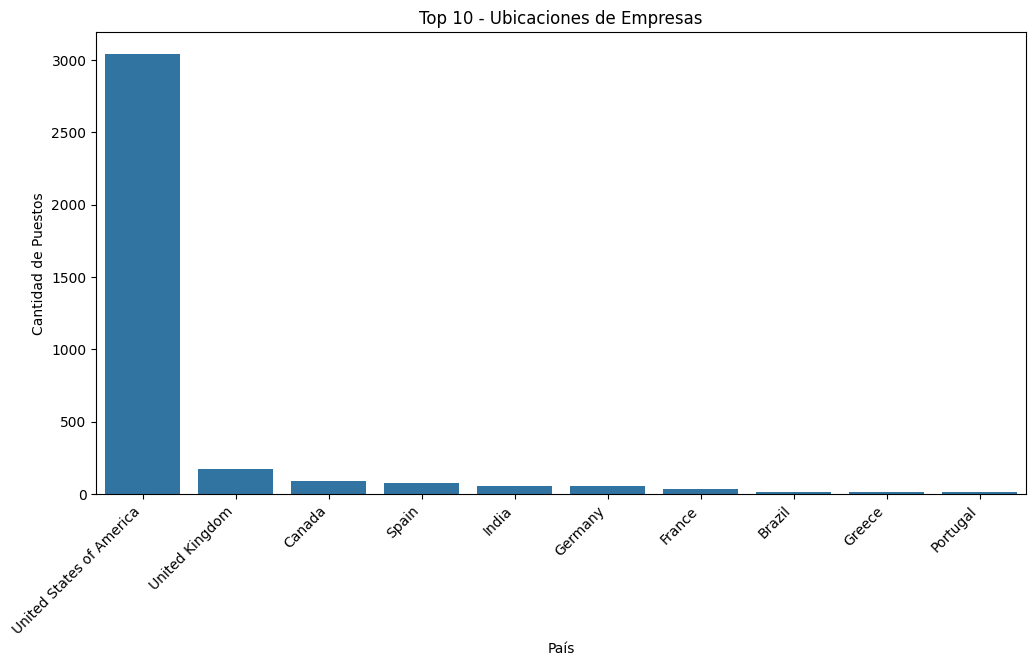

In [24]:
# Conteo de las 10 principales ubicaciones de empresas
conteo_ubicacion_empresa = df['company_location'].value_counts().nlargest(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_ubicacion_empresa.index, y=conteo_ubicacion_empresa.values)
plt.title('Top 10 - Ubicaciones de empresas')
plt.xlabel('País')
plt.ylabel('Cantidad de puestos')
plt.xticks(rotation=45, ha='right')
plt.show()

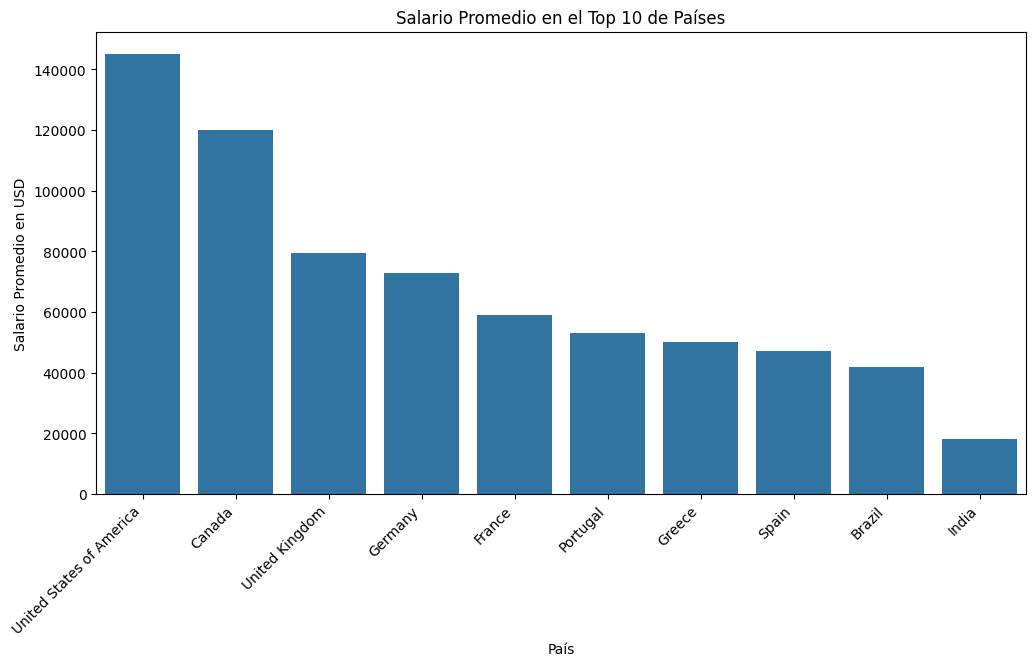

In [25]:
# Mediana salarial para el top 10 de ubicaciones de empresas
mediana_salario_ubicacion = df.groupby('company_location')['salary_in_usd'].median().loc[conteo_ubicacion_empresa.index].sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=mediana_salario_ubicacion.index, y=mediana_salario_ubicacion.values)
plt.title('Salario promedio en el top 10 de países')
plt.xlabel('País')
plt.ylabel('Salario promedio en USD')
plt.xticks(rotation=45, ha='right')
plt.show()

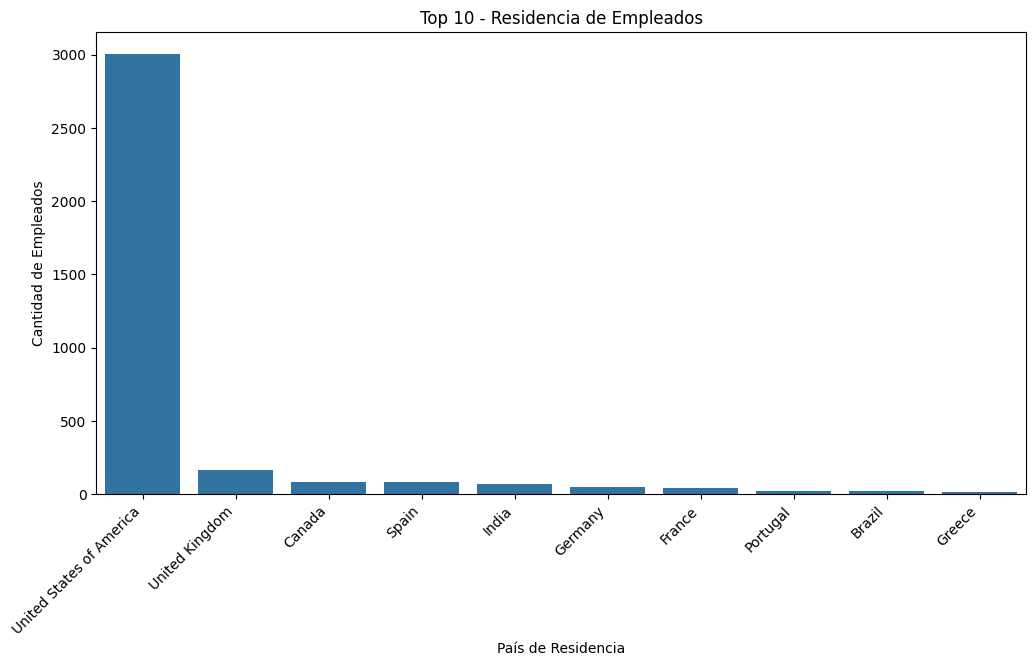

In [26]:
# Conteo de las 10 principales residencias de empleados
conteo_residencia_empleado = df['employee_residence'].value_counts().nlargest(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_residencia_empleado.index, y=conteo_residencia_empleado.values)
plt.title('Top 10 - residencia de empleados')
plt.xlabel('País de residencia')
plt.ylabel('Cantidad de empleados')
plt.xticks(rotation=45, ha='right')
plt.show()

Estados Unidos es, con diferencia, el país con mayor concentración de empresas del sector de la ciencia de datos. En cuanto a la remuneración, dentro de los 10 países con más oferta, Estados Unidos y Canadá lideran con los salarios promedio más altos.

# 6. Job_title

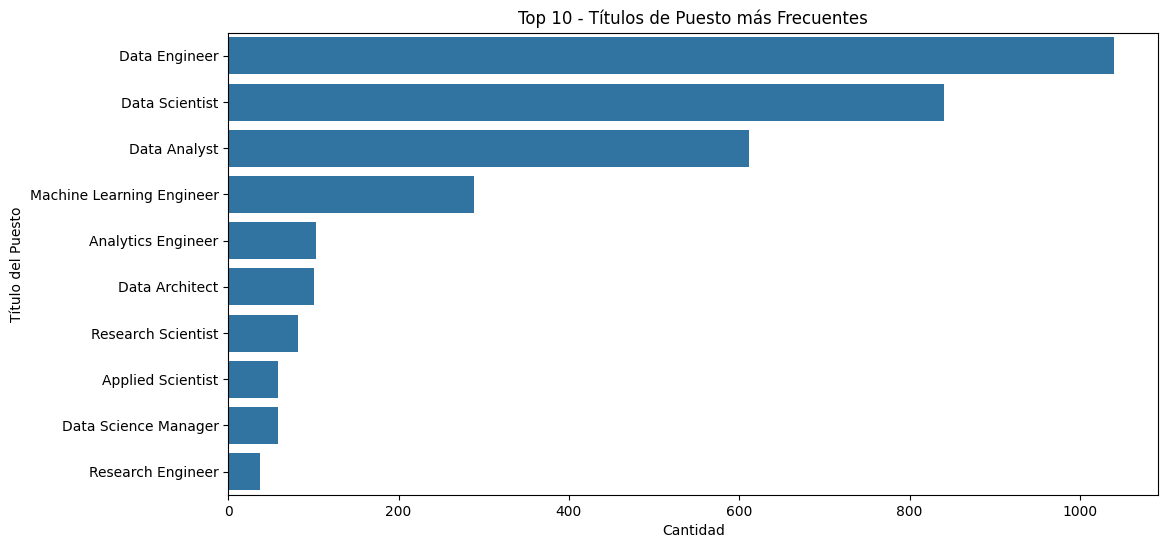

In [27]:
# Conteo de los 10 principales títulos de puesto
conteo_puestos = df['job_title'].value_counts().nlargest(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(y=conteo_puestos.index, x=conteo_puestos.values, orient='h')
plt.title('Top 10 - títulos de puesto más frecuentes')
plt.xlabel('Cantidad')
plt.ylabel('Título del puesto')
plt.show()

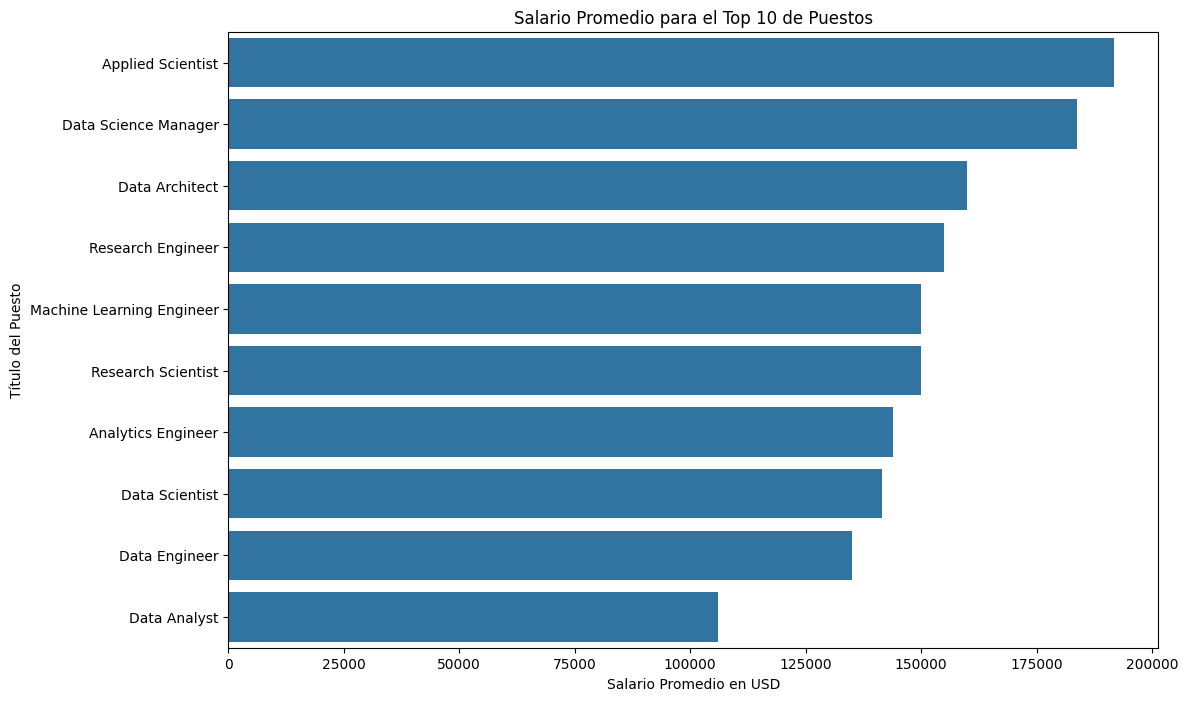

In [28]:
# Mediana salarial para los 10 puestos más comunes
mediana_salario_puesto = df.groupby('job_title')['salary_in_usd'].median().loc[conteo_puestos.index].sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=mediana_salario_puesto.index, x=mediana_salario_puesto.values, orient='h')
plt.title('Salario promedio para el Top 10 de puestos')
plt.xlabel('Salario promedio en USD')
plt.ylabel('Título del puesto')
plt.show()

Los títulos de puesto más comunes son "Data Engineer," "Data Scientist," y "Data Analyst." El salario promedio varía significativamente entre los diferentes títulos. La mayoría de los 10 puestos principales requieren un nivel de experiencia 'Senior'. Además, se ha observado una tendencia al alza en el salario desde 2020 hasta 2023 para la mayoría de estos roles.

# 7. Remote_ratio

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64


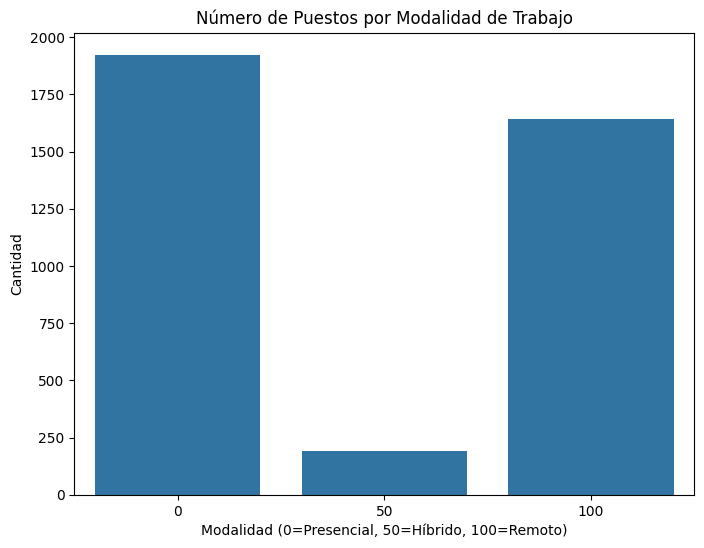

In [29]:
# Conteo de puestos por tipo de modalidad de trabajo
conteo_modalidad_trabajo = df['remote_ratio'].value_counts()
print(conteo_modalidad_trabajo)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_modalidad_trabajo.index, y=conteo_modalidad_trabajo.values)
plt.title('Número de puestos por modalidad de trabajo')
plt.xlabel('Modalidad (0=Presencial, 50=Híbrido, 100=Remoto)')
plt.ylabel('Cantidad')
plt.show()

remote_ratio
0      139600.0
50      63312.0
100    135000.0
Name: salary_in_usd, dtype: float64


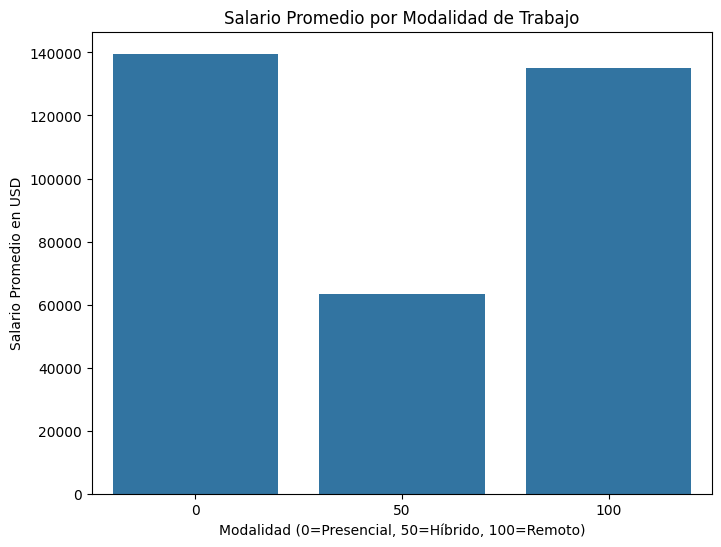

In [30]:
# Se calcula la mediana salarial por modalidad de trabajo
mediana_salario_modalidad = df.groupby('remote_ratio')['salary_in_usd'].median()
print(mediana_salario_modalidad)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mediana_salario_modalidad.index, y=mediana_salario_modalidad.values)
plt.title('Salario promedio por modalidad de trabajo')
plt.xlabel('Modalidad (0=Presencial, 50=Híbrido, 100=Remoto)')
plt.ylabel('Salario promedio en USD')
plt.show()

mismo_pais
True     3659
False      96
Name: count, dtype: int64


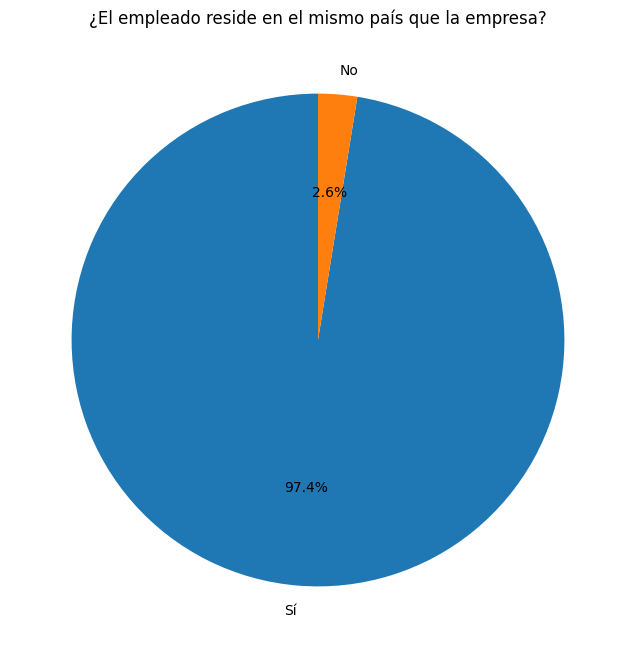

In [31]:
# Conteo de empleados que trabajan en el mismo país de la empresa
conteo_mismo_pais = df['mismo_pais'].value_counts()
print(conteo_mismo_pais)

# Gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(conteo_mismo_pais, labels=['Sí', 'No'], autopct='%1.1f%%', startangle=90)
plt.title('¿El empleado reside en el mismo país que la empresa?')
plt.ylabel('')
plt.show()

# 8 Employee_residence

                          conteo_de_datos  porcentaje
employee_residence                                   
United States of America             3004   80.000000
United Kingdom                        167    4.447403
Canada                                 85    2.263648
Spain                                  80    2.130493
India                                  71    1.890812
...                                   ...         ...
Serbia                                  1    0.026631
New Zealand                             1    0.026631
Moldova                                 1    0.026631
Luxembourg                              1    0.026631
Malta                                   1    0.026631

[78 rows x 2 columns]
          employee_residence  salary_in_usd
20  United States of America       145000.0
4                     Canada       120000.0
9                    Ireland       101943.0
19            United Kingdom        80036.0
6                    Germany        76833.0
1          

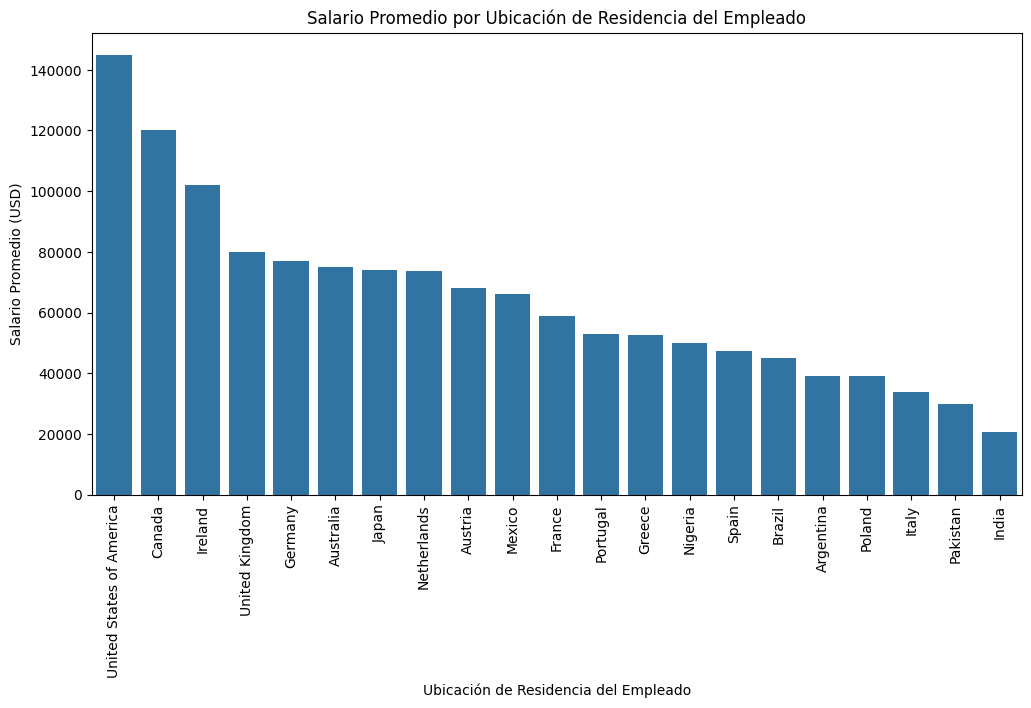

In [32]:
def analizar_conteo_y_porcentaje(df, columna):
    conteo = df[columna].value_counts()
    porcentaje = df[columna].value_counts(normalize=True) * 100
    return pd.DataFrame({'conteo_de_datos': conteo, 'porcentaje': porcentaje})

datos_residencia = analizar_conteo_y_porcentaje(df, "employee_residence")
print(datos_residencia)

# Filtrar ubicaciones de residencia con más de 5 empleados
residencias_filtradas = datos_residencia[datos_residencia["conteo_de_datos"] > 5].index

# Filtrar el DataFrame original por las ubicaciones de residencia seleccionadas
df_filtrado = df[df["employee_residence"].isin(residencias_filtradas)]

# Calcular el salario promedio por ubicación de residencia del empleado
salario_promedio_por_residencia = df_filtrado.groupby("employee_residence")["salary_in_usd"].median().reset_index()

# Ordenar las ubicaciones por salario promedio en orden descendente
salario_promedio_por_residencia = salario_promedio_por_residencia.sort_values("salary_in_usd", ascending=False)
print(salario_promedio_por_residencia)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="employee_residence", y="salary_in_usd", data=salario_promedio_por_residencia)
plt.xlabel("Ubicación de residencia del empleado")
plt.ylabel("Salario promedio (USD)")
plt.title("Salario promedio por ubicación de residencia del empleado")
plt.xticks(rotation=90)
plt.show()

## 5. Correlations

In [33]:

# Se definen las columnas numéricas y categóricas para transformar.
columnas_numericas = ['work_year', 'salary_in_usd']
columnas_categoricas = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size', 'remote_ratio']

# Se inicializa el codificador
codificador = OrdinalEncoder()

# Se codifican las columnas categóricas
columnas_categoricas_codificadas = codificador.fit_transform(df[columnas_categoricas])
columnas_categoricas_codificadas = pd.DataFrame(data=columnas_categoricas_codificadas, columns=columnas_categoricas)

# Se crea un nuevo DataFrame combinando las columnas numéricas y las categóricas codificadas
df_nuevo = df[columnas_numericas].join(columnas_categoricas_codificadas)
df_nuevo.head()

,work_year,salary_in_usd,experience_level,employment_type,job_title,employee_residence,company_location,company_size,remote_ratio
0,2023,85847,3.0,2.0,84.0,66.0,62.0,0.0,2.0
1,2023,30000,2.0,0.0,66.0,75.0,70.0,2.0,2.0
2,2023,25500,2.0,0.0,66.0,75.0,70.0,2.0,2.0
3,2023,175000,3.0,2.0,47.0,11.0,12.0,1.0,2.0
4,2023,120000,3.0,2.0,47.0,11.0,12.0,1.0,2.0


In [34]:
# Se calcula la matriz de correlación de Spearman
matriz_corr = df_nuevo.corr(method='spearman')
print(matriz_corr)

# Se obtienen las coordenadas de correlaciones mayores a 0.81 y no iguales a 1
filas, columnas = np.where((matriz_corr > 0.81) & (matriz_corr < 1))

# Se comprueba si hay correlaciones que cumplan la condición
if len(filas) > 0:
    for fila, columna in zip(filas, columnas):
        print("Fila:", matriz_corr.index[fila], "- Columna:", matriz_corr.columns[columna])
else:
    print("No hay correlaciones mayores a 0.81 y no iguales a 1.")

                    work_year  salary_in_usd  experience_level  \
work_year            1.000000       0.210749          0.158267   
salary_in_usd        0.210749       1.000000          0.375241   
experience_level     0.158267       0.375241          1.000000   
employment_type     -0.010722      -0.009378         -0.034185   
job_title           -0.022782       0.152563          0.025370   
employee_residence   0.253402       0.488665          0.322788   
company_location     0.237393       0.478019          0.312936   
company_size         0.142470       0.015739          0.072653   
remote_ratio        -0.251766      -0.063080         -0.046570   

                    employment_type  job_title  employee_residence  \
work_year                 -0.010722  -0.022782            0.253402   
salary_in_usd             -0.009378   0.152563            0.488665   
experience_level          -0.034185   0.025370            0.322788   
employment_type            1.000000  -0.044955           -0

In [35]:
# Se seleccionan las dos columnas específicas que queremos correlacionar
variable_a = df_nuevo['employee_residence']
variable_b = df_nuevo['company_location']

# Se calcula el coeficiente de correlación de Spearman y el valor p
correlacion, valor_p = spearmanr(variable_a, variable_b)

# Se imprimen los resultados
print("Coeficiente de correlación de spearman:", correlacion)
print("Valor-P:", valor_p)

# Se comprueba si la correlación es estadísticamente significativa
if valor_p < 0.05:
    print("La correlación es estadísticamente significativa.")
else:
    print("No hay suficiente evidencia para afirmar que la correlación es significativa.")

Coeficiente de Correlación de Spearman: 0.9521385973056874
Valor-P: 0.0
La correlación es estadísticamente significativa.


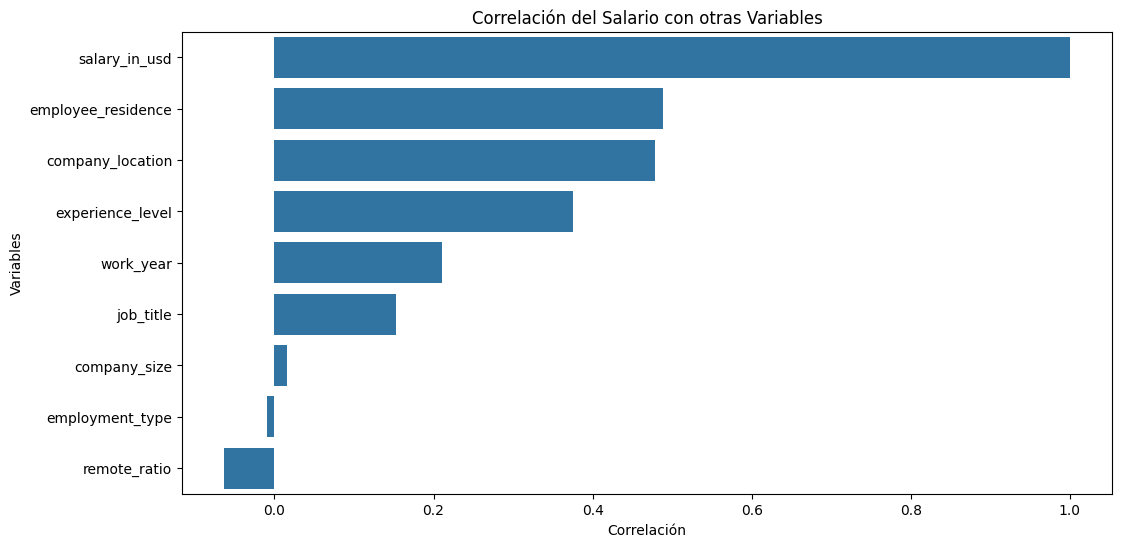

In [36]:
corr_salario_variables = matriz_corr['salary_in_usd'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_salario_variables.values, y=corr_salario_variables.index, orient='h')
plt.title('Correlación del salario con otras variables')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.show()

## 6 Test Hipotesis

In [37]:
def comprobar_cambio_variable(df, variable, categoria):
    """
    Esta función realiza pruebas de hipótesis para determinar si los salarios ajustados por inflación
    para una categoría específica de una variable dada han experimentado un aumento significativo en diferentes años.

    Parámetros:
    - df: DataFrame que contiene los datos para el análisis.
    - variable: Nombre de la variable cuya categoría se analizará.
    - categoria: Categoría específica de la variable para la cual se realizará el análisis.
    """
    print(f"Categoría: {categoria}")
    ano1, ano2, ano3, ano4 = 2020, 2021, 2022, 2023

    salarios_ano1 = df[(df['work_year'] == ano1) & (df[variable] == categoria)]['salary_in_usd']
    salarios_ano2 = df[(df['work_year'] == ano2) & (df[variable] == categoria)]['salary_in_usd']
    salarios_ano3 = df[(df['work_year'] == ano3) & (df[variable] == categoria)]['salary_in_usd']
    salarios_ano4 = df[(df['work_year'] == ano4) & (df[variable] == categoria)]['salary_in_usd']

    # Se comprueba que haya datos para realizar la prueba
    if not salarios_ano1.empty and not salarios_ano2.empty:
        resultado_1_2 = mannwhitneyu(salarios_ano1, salarios_ano2, alternative='less')
        p_valor_1_2 = resultado_1_2.pvalue
        print(f"{ano1} - {ano2}: {'Incrementó' if p_valor_1_2 < 0.05 else 'No incrementó'} (p-value: {p_valor_1_2:.6f})")

    if not salarios_ano2.empty and not salarios_ano3.empty:
        resultado_2_3 = mannwhitneyu(salarios_ano2, salarios_ano3, alternative='less')
        p_valor_2_3 = resultado_2_3.pvalue
        print(f"{ano2} - {ano3}: {'Incrementó' if p_valor_2_3 < 0.05 else 'No incrementó'} (p-value: {p_valor_2_3:.6f})")

    if not salarios_ano3.empty and not salarios_ano4.empty:
        resultado_3_4 = mannwhitneyu(salarios_ano3, salarios_ano4, alternative='less')
        p_valor_3_4 = resultado_3_4.pvalue
        print(f"{ano3} - {ano4}: {'Incrementó' if p_valor_3_4 < 0.05 else 'No incrementó'} (p-value: {p_valor_3_4:.6f})")

# Probando la función con algunas categorías
comprobar_cambio_variable(df, 'company_size', 'L')
comprobar_cambio_variable(df, 'experience_level', 'SE') # 'SE' para Senior
comprobar_cambio_variable(df, 'employment_type', 'FT') # 'FT' para Full-time

Categoría: L
2020 - 2021: No incrementó (p-value: 0.231907)
2021 - 2022: Incrementó (p-value: 0.013920)
2022 - 2023: No incrementó (p-value: 0.249494)
Categoría: SE
2020 - 2021: No incrementó (p-value: 0.517883)
2021 - 2022: Incrementó (p-value: 0.001115)
2022 - 2023: Incrementó (p-value: 0.000008)
Categoría: FT
2020 - 2021: No incrementó (p-value: 0.196211)
2021 - 2022: Incrementó (p-value: 0.000000)
2022 - 2023: Incrementó (p-value: 0.000000)


In [38]:
# Se realiza la prueba U de Mann-Whitney para comparar las medianas salariales de cada año
anos = [2020, 2021, 2022, 2023]
for i in range(len(anos)):
    for j in range(i + 1, len(anos)):
        salarios_i = df[df['work_year'] == anos[i]]['salary_in_usd']
        salarios_j = df[df['work_year'] == anos[j]]['salary_in_usd']

        stat, p = mannwhitneyu(salarios_i, salarios_j)

        print(f"\nComparando {anos[i]} vs. {anos[j]}:")
        print(f'Estadístico U: {stat}')
        print(f'Valor-p: {p}')

        if p < 0.05:
            print(f"Hay una diferencia significativa en las medianas salariales entre {anos[i]} y {anos[j]}.")
        else:
            print(f"No hay una diferencia significativa en las medianas salariales entre {anos[i]} y {anos[j]}.")


Comparando 2020 vs. 2021:
Estadístico U: 8209.5
Valor-p: 0.4280231574809945
No hay una diferencia significativa en las medianas salariales entre 2020 y 2021.

Comparando 2020 vs. 2022:
Estadístico U: 33767.5
Valor-p: 6.025012409530372e-12
Hay una diferencia significativa en las medianas salariales entre 2020 y 2022.

Comparando 2020 vs. 2023:
Estadístico U: 29304.5
Valor-p: 4.566932933971625e-17
Hay una diferencia significativa en las medianas salariales entre 2020 y 2023.

Comparando 2021 vs. 2022:
Estadístico U: 115712.0
Valor-p: 2.218674604780811e-22
Hay una diferencia significativa en las medianas salariales entre 2021 y 2022.

Comparando 2021 vs. 2023:
Estadístico U: 102080.0
Valor-p: 1.8807969501872277e-35
Hay una diferencia significativa en las medianas salariales entre 2021 y 2023.

Comparando 2022 vs. 2023:
Estadístico U: 1284615.5
Valor-p: 6.802594340667413e-12
Hay una diferencia significativa en las medianas salariales entre 2022 y 2023.


In [39]:
# Se mapea remote_ratio a una forma más legible
df['modalidad_remoto'] = df['remote_ratio'].map({100: 'Remoto', 50: 'Híbrido', 0: 'Presencial'})

# Se cuenta el total de trabajos por año
total_por_ano = df.groupby('work_year').size()

# Se cuenta cuántos trabajos remotos hay por año
remoto_por_ano = df[df['modalidad_remoto'] == 'Remoto'].groupby('work_year').size()

# Se calcula el porcentaje de trabajos remotos por año
porcentaje_remoto = (remoto_por_ano / total_por_ano) * 100
print("Porcentaje de trabajo remoto por año:")
print(porcentaje_remoto)

Porcentaje de trabajo remoto por año:
work_year
2020    51.315789
2021    52.173913
2022    53.545673
2023    33.221289
dtype: float64


In [40]:
# Se realiza la prueba U de Mann-Whitney para ver si hay cambios significativos en la proporción de trabajo remoto.
anos = [2020, 2021, 2022, 2023]
for i in range(len(anos)):
    for j in range(i + 1, len(anos)):
        ratio_i = df[df['work_year'] == anos[i]]['remote_ratio']
        ratio_j = df[df['work_year'] == anos[j]]['remote_ratio']

        stat, p = mannwhitneyu(ratio_i, ratio_j, alternative="two-sided")

        print(f"\nComparando {anos[i]} vs. {anos[j]}:")
        print(f'Estadístico U: {stat}')
        print(f'Valor-p: {p}')

        if p < 0.05:
            print(f'Hay una diferencia significativa en la proporción de trabajo remoto entre {anos[i]} y {anos[j]}.')
        else:
            print(f'No hay una diferencia significativa en la proporción de trabajo remoto entre {anos[i]} y {anos[j]}.')


Comparando 2020 vs. 2021:
Estadístico U: 8414.0
Valor-p: 0.5916989051684823
No hay una diferencia significativa en la proporción de trabajo remoto entre 2020 y 2021.

Comparando 2020 vs. 2022:
Estadístico U: 68791.5
Valor-p: 0.1402425663900939
No hay una diferencia significativa en la proporción de trabajo remoto entre 2020 y 2022.

Comparando 2020 vs. 2023:
Estadístico U: 92064.5
Valor-p: 3.362620357768307e-10
Hay una diferencia significativa en la proporción de trabajo remoto entre 2020 y 2023.

Comparando 2021 vs. 2022:
Estadístico U: 214699.0
Valor-p: 0.0007124628087195913
Hay una diferencia significativa en la proporción de trabajo remoto entre 2021 y 2022.

Comparando 2021 vs. 2023:
Estadístico U: 287826.0
Valor-p: 1.2460776202981908e-30
Hay una diferencia significativa en la proporción de trabajo remoto entre 2021 y 2023.

Comparando 2022 vs. 2023:
Estadístico U: 1812318.5
Valor-p: 9.511000846729628e-38
Hay una diferencia significativa en la proporción de trabajo remoto entre 2

Basado en nuestro análisis y las pruebas U de Mann-Whitney realizadas, podemos arrojar luz sobre las hipótesis iniciales:

**Respecto a las Medianas Salariales en Ciencia de Datos:**
Nuestras hipótesis iniciales no han sido corroboradas en su totalidad. Si bien observamos cambios significativos en las medianas salariales entre 2021 y 2023, esta tendencia no fue evidente entre 2020 y 2021. Sin embargo, al analizar los años posteriores, es innegable que los salarios en el campo de la Ciencia de Datos han mostrado un notable incremento, validando parcialmente nuestra suposición inicial.

**Respecto al Trabajo Remoto:**
Contrario a lo que podríamos haber esperado, el trabajo remoto no ha aumentado consistentemente año tras año. Durante los primeros tres años del análisis, la proporción de trabajos remotos se mantuvo estable. Sin embargo, en 2023, experimentamos una caída significativa en el porcentaje de trabajos remotos, en contraste con los puestos presenciales o en la empresa. Esta tendencia puede estar influenciada, en gran medida, por la conclusión de la fase más crítica de la pandemia, llevando a empresas y empleados a regresar a modalidades de trabajo más tradicionales o presenciales.

En resumen, las dinámicas laborales y salariales en el campo de la Ciencia de Datos han demostrado ser susceptibles a diversos factores, incluyendo, pero no limitándose a, contextos globales como una pandemia. Estos hallazgos nos proporcionan una visión más clara y matizada del mercado laboral en esta área durante el período de 2020 a 2023.

In [42]:
# Se guarda el DataFrame procesado en un nuevo archivo CSV
df.to_csv('eda_salarios.csv', index=False)